In [90]:
import pandas as pd

In [91]:
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [156]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer

from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
plot_confusion_matrix,  precision_score, recall_score, accuracy_score, f1_score, \
log_loss, roc_curve, roc_auc_score, classification_report, plot_roc_curve

In [93]:
df = pd.read_csv('../Data/judge-1377884607_tweet_product_company.csv', encoding='Latin-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [94]:
# check for nulls on tweet_text
df['tweet_text'].isna().sum()

1

In [95]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [96]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [97]:
# replace iPhone to Apple
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPhone', value='Apple', inplace=True)

In [98]:
# replace ipad or iphone app to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPad or iPhone App', value='Apple', inplace=True)

In [99]:
# replace ipad or iphone app to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPad', value='Apple', inplace=True)

In [100]:
# replace ther Apple pr to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='Other Apple product or service', value='Apple', inplace=True)

In [101]:
df['emotion_in_tweet_is_directed_at'].value_counts()

Apple                              2409
Google                              430
Other Google product or service     293
Android App                          81
Android                              78
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [102]:
# replace Android App to Google
df['emotion_in_tweet_is_directed_at'].replace(to_replace='Android App', value='Google', inplace=True)

In [103]:
# replace ther Google product or service App to Google
df['emotion_in_tweet_is_directed_at'].replace(to_replace='Other Google product or service', value='Google', inplace=True)

In [104]:
# replace "Android" to Google
df['emotion_in_tweet_is_directed_at'].replace(to_replace='Android', value='Google', inplace=True)

In [105]:
df['emotion_in_tweet_is_directed_at'].value_counts()

Apple     2409
Google     882
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [106]:
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
sample_document = df['tweet_text'][1]
sample_document

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [108]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)
sample_doc = tokenizer.tokenize(sample_document)
sample_doc = [token.lower() for token in sample_doc]
sw = stopwords.words('english')
sample_doc = [token for token in sample_doc if token not in sw]


In [109]:
sample_doc

['jessedee',
 'know',
 'fludapp',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 "they're",
 'giving',
 'free',
 'ts',
 'sxsw']

In [110]:
# dropping the null value
df.dropna(subset=['tweet_text'], how='all', inplace=True)

In [111]:
# checking it has been dropped
df['tweet_text'].isna().sum()

0

In [112]:
# clean the text
# create a function
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  #remove @ mentions
    text = re.sub(r'#', '', text)   #remove the '# symbol'
    text = re.sub(r'RT[\s]+', '', text)   #remove RT retweet
    text = re.sub(r'https?:\/\/\S+', '', text)  #remove the hyper link
    
    return text

#cleaning the text
df['tweet_text'] = df['tweet_text'].apply(cleanTxt)

In [113]:
# We removed numbers and punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: remove_punct(x))

In [114]:
# @Terry: replaced Nan from second column to Apple or Google adding it to a fourth column
def Find_Apple_or_Google(text):
    category =''
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    sample_doc = tokenizer.tokenize(text)
    sample_doc = [token.lower() for token in sample_doc]
    sw = stopwords.words('english')
    sample_doc = [token for token in sample_doc if token not in sw]
    ap = ['apple', 'ipad', 'iphone']
    go = ['google','android']
    if any((match := item) in sample_doc for item in ap):
        return 'Apple'
    elif any((match := item) in sample_doc for item in go):
        return 'Google'
    else:
        return 'NAN'

In [115]:
ap = ['apple', 'ipad', 'iphone']
go = ['google','android']

In [116]:
if any((match := item) in sample_doc for item in ap):
   
    print(match)


ipad


In [117]:
if any((match := item) in sample_doc for item in ap):
   
    print(match)


ipad


In [118]:
df['Product_Category'] = df['tweet_text'].apply(lambda x: Find_Apple_or_Google(x))

In [119]:
df['Product_Category'].value_counts() 

Apple     5263
Google    2481
NAN       1348
Name: Product_Category, dtype: int64

In [120]:
def tokenization(text):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    sample_doc = tokenizer.tokenize(text)
    return sample_doc

In [121]:
df['Tweet_tokenized'] = df['tweet_text'].apply(lambda x: tokenization(x.lower()))

In [122]:
# stopwords english 
stopword = nltk.corpus.stopwords.words('english')

In [123]:
# adding sxsw to the stop words  
new_stopwords = ["sxsw"]
stopword.extend(new_stopwords)

In [124]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [125]:
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

In [126]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


In [127]:
df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))

In [128]:
df['tweet_text'][0]

' I have a G iPhone After  hrs tweeting at RISEAustin it was dead  I need to upgrade Plugin stations at SXSW'

In [129]:
df['Tweet_tokenized'][0]

['i',
 'have',
 'a',
 'g',
 'iphone',
 'after',
 'hrs',
 'tweeting',
 'at',
 'riseaustin',
 'it',
 'was',
 'dead',
 'i',
 'need',
 'to',
 'upgrade',
 'plugin',
 'stations',
 'at',
 'sxsw']

In [130]:
df['Tweet_stemmed'][0]

['g',
 'iphon',
 'hr',
 'tweet',
 'riseaustin',
 'dead',
 'need',
 'upgrad',
 'plugin',
 'station']

In [131]:
# this concludes the cleaning 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df['tweet_lemma'] = df['Tweet_nonstop'].apply(lambda x: word_lemmatizer(x))
df.tail(4)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Terry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tweet_lemma
9089,Wave buzz We interrupt your regularly schedule...,NaN,No emotion toward brand or product,Google,"[wave, buzz, we, interrupt, your, regularly, s...","[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, interrupt, regularli, schedul, ge...","[wave, buzz, interrupt, regularly, scheduled, ..."
9090,Googles Zeiger a physician never reported pote...,NaN,No emotion toward brand or product,NAN,"[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[googl, zeiger, physician, never, report, pote...","[google, zeiger, physician, never, reported, p..."
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,Apple,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphon, custom, complain, time, fell,...","[verizon, iphone, customer, complained, time, ..."
9092,Ï¡ÏàüÊÎÒ£Áââ£âÛâGoogle ...,NaN,No emotion toward brand or product,Google,"[google, tests, checkin, offers, at, sxsw, link]","[google, tests, checkin, offers, link]","[googl, test, checkin, offer, link]","[google, test, checkin, offer, link]"


In [132]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [133]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def visualize_top_10(freq_dist, title):
    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]
    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)
    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

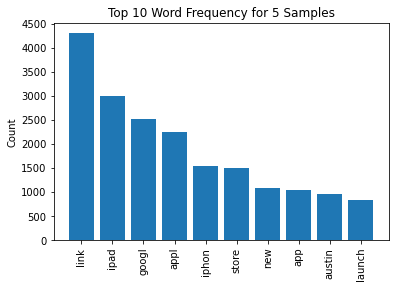

In [134]:
sample_freq_dist = FreqDist(df['Tweet_stemmed'].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency for 5 Samples")

In [135]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=sw)

In [136]:
# making 'tweet_lemma' into sentce instead of a list
df['lemma_sentence'] =df['tweet_lemma'].apply(lambda x: " ".join(x))
df.head(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tweet_lemma,lemma_sentence
0,I have a G iPhone After hrs tweeting at RISE...,Apple,Negative emotion,Apple,"[i, have, a, g, iphone, after, hrs, tweeting, ...","[g, iphone, hrs, tweeting, riseaustin, dead, n...","[g, iphon, hr, tweet, riseaustin, dead, need, ...","[g, iphone, hr, tweeting, riseaustin, dead, ne...",g iphone hr tweeting riseaustin dead need upgr...
1,Know about Awesome iPadiPhone app that youl...,Apple,Positive emotion,NAN,"[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely...","[know, awesom, ipadiphon, app, youll, like, ap...","[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,Can not wait for iPad also They should sale ...,Apple,Positive emotion,Apple,"[can, not, wait, for, ipad, also, they, should...","[wait, ipad, also, sale]","[wait, ipad, also, sale]","[wait, ipad, also, sale]",wait ipad also sale


In [137]:
# selecting only the positive and negative values from the dataset 
df1 = df[(df.is_there_an_emotion_directed_at_a_brand_or_product == 'Positive emotion') | (df.is_there_an_emotion_directed_at_a_brand_or_product == 'Negative emotion')]
df1.head(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tweet_lemma,lemma_sentence
0,I have a G iPhone After hrs tweeting at RISE...,Apple,Negative emotion,Apple,"[i, have, a, g, iphone, after, hrs, tweeting, ...","[g, iphone, hrs, tweeting, riseaustin, dead, n...","[g, iphon, hr, tweet, riseaustin, dead, need, ...","[g, iphone, hr, tweeting, riseaustin, dead, ne...",g iphone hr tweeting riseaustin dead need upgr...
1,Know about Awesome iPadiPhone app that youl...,Apple,Positive emotion,NAN,"[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely...","[know, awesom, ipadiphon, app, youll, like, ap...","[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,Can not wait for iPad also They should sale ...,Apple,Positive emotion,Apple,"[can, not, wait, for, ipad, also, they, should...","[wait, ipad, also, sale]","[wait, ipad, also, sale]","[wait, ipad, also, sale]",wait ipad also sale


In [138]:
# sanity check
df1['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2978
Negative emotion     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [139]:
df1['emotion_in_tweet_is_directed_at'].value_counts()

Apple     2337
Google     854
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [140]:
df1['emotion_in_tweet_is_directed_at']

0        Apple
1        Apple
2        Apple
3        Apple
4       Google
         ...  
9077     Apple
9079     Apple
9080    Google
9085     Apple
9088     Apple
Name: emotion_in_tweet_is_directed_at, Length: 3548, dtype: object

In [141]:
df1[df1['emotion_in_tweet_is_directed_at'].isna()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tweet_lemma,lemma_sentence
46,HandHeld Û÷HoboÛª Drafthouse launches Û÷Hob...,NaN,Positive emotion,Apple,"[handheld, hobo, drafthouse, launches, hobo, w...","[handheld, hobo, drafthouse, launches, hobo, s...","[handheld, hobo, drafthous, launch, hobo, shot...","[handheld, hobo, drafthouse, launch, hobo, sho...",handheld hobo drafthouse launch hobo shotgun i...
64,Again Line at the Apple store is insane sxsw,NaN,Negative emotion,Apple,"[again, line, at, the, apple, store, is, insan...","[line, apple, store, insane]","[line, appl, store, insan]","[line, apple, store, insane]",line apple store insane
68,Boooo Flipboard is developing an iPhone versio...,NaN,Negative emotion,Apple,"[boooo, flipboard, is, developing, an, iphone,...","[boooo, flipboard, developing, iphone, version...","[boooo, flipboard, develop, iphon, version, an...","[boooo, flipboard, developing, iphone, version...",boooo flipboard developing iphone version andr...
103,Know that quotdatavizquot translates to quotsa...,NaN,Negative emotion,Apple,"[know, that, quotdatavizquot, translates, to, ...","[know, quotdatavizquot, translates, quotsatani...","[know, quotdatavizquot, translat, quotsatanicq...","[know, quotdatavizquot, translates, quotsatani...",know quotdatavizquot translates quotsatanicquo...
112,Spark for android is up for a teamandroid awar...,NaN,Positive emotion,Google,"[spark, for, android, is, up, for, a, teamandr...","[spark, android, teamandroid, award, read, link]","[spark, android, teamandroid, award, read, link]","[spark, android, teamandroid, award, read, link]",spark android teamandroid award read link
...,...,...,...,...,...,...,...,...,...
9011,apparently the line to get an iPad at the sxsw...,NaN,Positive emotion,Apple,"[apparently, the, line, to, get, an, ipad, at,...","[apparently, line, get, ipad, store, grew, blo...","[appar, line, get, ipad, store, grew, block, b...","[apparently, line, get, ipad, store, grew, blo...",apparently line get ipad store grew block bloc...
9043,Hey is anyone doing sxsw signing up for the gr...,NaN,Negative emotion,Apple,"[hey, is, anyone, doing, sxsw, signing, up, fo...","[hey, anyone, signing, group, texting, app, gr...","[hey, anyon, sign, group, text, app, groupm, g...","[hey, anyone, signing, group, texting, app, gr...",hey anyone signing group texting app groupme g...
9049,you can buy my used iPad and Ill pick one up ...,NaN,Positive emotion,Apple,"[you, can, buy, my, used, ipad, and, ill, pick...","[buy, used, ipad, ill, pick, one, tomorrow]","[buy, use, ipad, ill, pick, one, tomorrow]","[buy, used, ipad, ill, pick, one, tomorrow]",buy used ipad ill pick one tomorrow
9052,You could buy a new iPad tmrw at the Apple p...,NaN,Positive emotion,Apple,"[you, could, buy, a, new, ipad, tmrw, at, the,...","[could, buy, new, ipad, tmrw, apple, popup, st...","[could, buy, new, ipad, tmrw, appl, popup, sto...","[could, buy, new, ipad, tmrw, apple, popup, st...",could buy new ipad tmrw apple popup store link


In [142]:
df1['Product_Category'].value_counts()

Apple     2401
Google     865
NAN        282
Name: Product_Category, dtype: int64

In [143]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split
X = df1['lemma_sentence']
y = df1['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features = 25)
X_vec = vec.fit_transform(X_train)
df_v = pd.DataFrame(X_vec.toarray(), columns=vec.get_feature_names())
df_v

,amp,android,app,apple,austin,circle,day,free,get,google,...,line,link,new,one,party,popup,social,store,time,via
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2658,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2659,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()
# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_vec , y_train)
baseline_cv

array([0.84052533, 0.83646617, 0.84398496, 0.82706767, 0.83082707])

RandomForest Model

In [146]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_tr_ohe = X_train.to_numpy().reshape(-1, 1)
X_te_ohe = X_test.to_numpy().reshape(-1, 1)
X_train_ohe = ohe.fit_transform(X_tr_ohe)
X_test_ohe = ohe.transform(X_te_ohe)

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
model_ran = RandomForestClassifier(random_state=42)
model_ran.fit(X_train_ohe, y_train)
y_pred_ran = model.predict(X_test_ohe)
print("Training Accuracy :", model_ran.score(X_train_ohe, y_train))
print("Testing Accuracy :", model_ran.score(X_test_ohe, y_test))


Training Accuracy : 0.9988726042841037
Testing Accuracy : 0.874859075535513


In [153]:
ran1_cv = cross_val_score(model_ran, X_train_ohe, y_train, cv=5)
ran1_cv.mean()

0.8526894158473107

In [150]:
print(classification_report(y_test, y_pred_ran))

                  precision    recall  f1-score   support

Negative emotion       0.93      0.20      0.34       137
Positive emotion       0.87      1.00      0.93       750

        accuracy                           0.87       887
       macro avg       0.90      0.60      0.63       887
    weighted avg       0.88      0.87      0.84       887



In [151]:
from sklearn.tree import DecisionTreeClassifier
model_de = DecisionTreeClassifier()
model_de.fit(X_train_ohe, y_train)
y_pred_de = model_de.predict(X_test_ohe)
print("Training Accuracy :", model_de.score(X_train_ohe, y_train))
print("Testing Accuracy :", model_de.score(X_test_ohe, y_test))


Training Accuracy : 0.9992484028560692
Testing Accuracy : 0.874859075535513


In [154]:
dt1_cv = cross_val_score(model_de, X_train_ohe, y_train, cv=5)
dt1_cv.mean()

0.8526894158473107

In [152]:
print(classification_report(y_test, y_pred_de))

                  precision    recall  f1-score   support

Negative emotion       0.93      0.20      0.34       137
Positive emotion       0.87      1.00      0.93       750

        accuracy                           0.87       887
       macro avg       0.90      0.60      0.63       887
    weighted avg       0.88      0.87      0.84       887



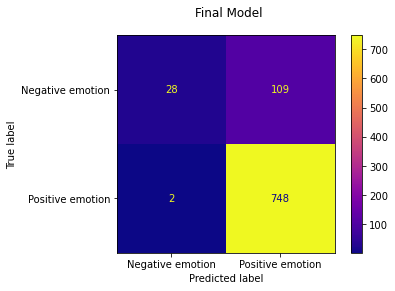

In [160]:
fig, ax = plt.subplots()

fig.suptitle("Final Model")

plot_confusion_matrix(model_de, X_test_ohe, y_test, ax=ax, cmap="plasma");

In [157]:
from sklearn.tree import DecisionTreeClassifier
model2_de = DecisionTreeClassifier(max_depth=2)
model2_de.fit(X_train_ohe, y_train)
y_pred_de = model2_de.predict(X_test_ohe)
print("Training Accuracy :", model2_de.score(X_train_ohe, y_train))
print("Testing Accuracy :", model2_de.score(X_test_ohe, y_test))


Training Accuracy : 0.8391582111987974
Testing Accuracy : 0.8478015783540023


In [158]:
dt2_cv = cross_val_score(model2_de, X_train_ohe, y_train, cv=5)
dt2_cv.mean()

0.8372794086529645

In [159]:
print(classification_report(y_test, y_pred_de))

                  precision    recall  f1-score   support

Negative emotion       1.00      0.01      0.03       137
Positive emotion       0.85      1.00      0.92       750

        accuracy                           0.85       887
       macro avg       0.92      0.51      0.47       887
    weighted avg       0.87      0.85      0.78       887



In [54]:
# making 'tweet_lemma' into sentce instead of a list
df['lemma_sentence'] =df['tweet_lemma'].apply(lambda x: " ".join(x))
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tweet_lemma,lemma_sentence
0,I have a G iPhone After hrs tweeting at RISE...,Apple,Negative emotion,Apple,"[i, have, a, g, iphone, after, hrs, tweeting, ...","[g, iphone, hrs, tweeting, riseaustin, dead, n...","[g, iphon, hr, tweet, riseaustin, dead, need, ...","[g, iphone, hr, tweeting, riseaustin, dead, ne...",g iphone hr tweeting riseaustin dead need upgr...
1,Know about Awesome iPadiPhone app that youl...,Apple,Positive emotion,NAN,"[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely...","[know, awesom, ipadiphon, app, youll, like, ap...","[know, awesome, ipadiphone, app, youll, likely...",know awesome ipadiphone app youll likely appre...
2,Can not wait for iPad also They should sale ...,Apple,Positive emotion,Apple,"[can, not, wait, for, ipad, also, they, should...","[wait, ipad, also, sale, sxsw]","[wait, ipad, also, sale, sxsw]","[wait, ipad, also, sale, sxsw]",wait ipad also sale sxsw
3,I hope this years festival isnt as crashy as ...,Apple,Negative emotion,Apple,"[i, hope, this, years, festival, isnt, as, cra...","[hope, years, festival, isnt, crashy, years, i...","[hope, year, festiv, isnt, crashi, year, iphon...","[hope, year, festival, isnt, crashy, year, iph...",hope year festival isnt crashy year iphone app...
4,great stuff on Fri SXSW Marissa Mayer Google ...,Google,Positive emotion,Google,"[great, stuff, on, fri, sxsw, marissa, mayer, ...","[great, stuff, fri, sxsw, marissa, mayer, goog...","[great, stuff, fri, sxsw, marissa, mayer, goog...","[great, stuff, fri, sxsw, marissa, mayer, goog...",great stuff fri sxsw marissa mayer google tim ...
...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere SXSW link,Apple,Positive emotion,Apple,"[ipad, everywhere, sxsw, link]","[ipad, everywhere, sxsw, link]","[ipad, everywher, sxsw, link]","[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9089,Wave buzz We interrupt your regularly schedule...,NaN,No emotion toward brand or product,Google,"[wave, buzz, we, interrupt, your, regularly, s...","[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, interrupt, regularli, schedul, sx...","[wave, buzz, interrupt, regularly, scheduled, ...",wave buzz interrupt regularly scheduled sxsw g...
9090,Googles Zeiger a physician never reported pote...,NaN,No emotion toward brand or product,NAN,"[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[googl, zeiger, physician, never, report, pote...","[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,Apple,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphon, custom, complain, time, fell,...","[verizon, iphone, customer, complained, time, ...",verizon iphone customer complained time fell b...


In [102]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/raulcassieltorresponce/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [106]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [109]:
sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet_text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet_text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet_text"]]

In [91]:
# Creating a function to get subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns 
df['Subjectivity'] = df['tweet_lemma'].apply(getSubjectivity)
df['Polarity'] = df['tweet_lemma'].apply(getPolarity)

# show the new dataframe with the new columns 
df

NameError: name 'TextBlob' is not defined

In [69]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Tweet_stemmed'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('pol')
plt.ylabel('subjec')
plt.show()

KeyError: 'Subjectivity'

<Figure size 576x432 with 0 Axes>

In [120]:
# # import SentimentIntensityAnalyzer class
# # from vaderSentiment.vaderSentiment module.
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# # function to print sentiments
# # of the sentence.
# def sentiment_scores(sentence):
#     # Create a SentimentIntensityAnalyzer object.
#     sid_obj = SentimentIntensityAnalyzer()
#     # polarity_scores method of SentimentIntensityAnalyzer
#     # object gives a sentiment dictionary.
#     # which contains pos, neg, neu, and compound scores.
#     sentiment_dict = sid_obj.polarity_scores(sentence)
#     print("Overall sentiment dictionary is : ", sentiment_dict)
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
#     print("Sentence Overall Rated As", end = " ")
#     # decide sentiment as positive, negative and neutral
#     if sentiment_dict['compound'] >= 0.05 :
#         return"Positive emotion"
#     elif sentiment_dict['compound'] <= - 0.05 :
#         return"Negative emotion"
#     else :
#         return"Neutral"

In [121]:
# df['emotion'] =df['lemma_sentence'].apply(lambda x: sentiment_scores(x))


Overall sentiment dictionary is :  {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  32.300000000000004 % Negative
sentence was rated as  67.7 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.419, 'pos': 0.581, 'compound': 0.91}
sentence was rated as  0.0 % Negative
sentence was rated as  41.9 % Neutral
sentence was rated as  58.099999999999994 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.7269}
sentence was rated as  0.0 % Negative
sentence was rated as  53.400000000000006 % Neutral
sentence was rated as  46.6 % Positive
Sentence Overall Rated As Overall sentiment 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  68.0 % Neutral
sentence was rated as  32.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, '

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.9246}
sentence was rated as  0.0 % Negative
sentence was rated as  42.1 % Neutral
sentence was rated as  57.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  70.6 % Neutral
sentence was rated as  29.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.177, 'pos': 0.823, 'compound': 0.8519}
sentence was rated as  0.0 % Negative
sentence was rated as  17.7 % Neutral
sentence was rated as  82.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  68.60000000000001 % Neutral
sentence was rated as  31.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.4588}
sentence was rated as  0.0 % Negative
sentence was rated as  69.19999999999999 % Neutral
sentence was rated as  30.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.3818}
sentence was rated as  0.0 % Negative
sentence was rated as  73.5 % Neutral
sentence was rated as  26.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  81.8 % Neutral
sentence was rated as  18.2 % Positive
Sentence Overall Rated As 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  92.5 % Neutral
sentence was rated as  7.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.562, 'neu': 0.274, 'pos': 0.164, 'compound': -0.7783}
sentence was rated as  56.2 % Negative
sentence was rated as  27.400000000000002 % Neutral
sentence was rated as  16.400000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.13, 'neu': 0.628, 'pos': 0.242, 'compound': 0.3612}
sentence was rated as  13.0 % Negative
sentence was rated as  62.8 % Neutral
sentence was rated as  24.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  70.8 % Neutral
sentence was rated as  29.2 % Positive
Sentence Overall Ra

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.2263}
sentence was rated as  13.700000000000001 % Negative
sentence was rated as  86.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  77.4 % Neutral
sentence was rated as  22.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.1779}
sentence was rated as  0.0 % Negative
sentence was rated as  88.4 % Neutral
sentence was rated as  11.600000000000001 % Positive
Sentence Overall Rated As Over

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2023}
sentence was rated as  0.0 % Negative
sentence was rated as  87.0 % Neutral
sentence was rated as  13.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, '

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  19.3 % Negative
sentence was rated as  80.7 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  83.8 % Neutral
sentence was rated as  16.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  68.7 % Neutral
sentence was rated as  31.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.2023}
sentence was rated as  0.0 % Negative
sentence was rated as  87.8 % Neutral
sentence was rated as  12.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.4215}
sentence was rated as  17.7 % Negative
sentence was rated as  82.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  68.2 % Neutral
sentence was rated as  31.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  75.6 % Neutral
sentence was rated as  24.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  72.2 % Neutral
sentence was rated as  27.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
sentence was rated as  31.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall senti

sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  46.2 % Negative
sentence was rated as  53.800000000000004 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'compound': 0.7579}
sentence was rated as  0.0 % Negative
sentence was rated as  62.9 % Neutral
sentence was 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  56.8 % Neutral
sentence was rated as  43.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  56.8 % Neutral
sentence was rated as  43.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  56.8 % Neutral
sentence was rated as  43.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  61.199999999999996 % Neutral
sentence was rated as  38.800000000000004 % Positive
Sentence Overall Rated A

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

sentence was rated as  0.0 % Negative
sentence was rated as  67.80000000000001 % Neutral
sentence was rated as  32.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.28, 'neu': 0.629, 'pos': 0.091, 'compound': -0.4019}
sentence was rated as  28.000000000000004 % Negative
sente

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.3412}
sentence was rated as  15.6 % Negative
sentence was rated as  84.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  77.4 % Neutral
sentence was rated as  22.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  76.2 % Neutral
sentence was rated as  23.799999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictiona

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  87.2 % Neutral
sentence was rated as  12.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  81.6 % Neutral
sentence was rated as  18.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.6124}
sentence was rated as  0.0 % Negative
sentence was rated as  72.2 % Neutral
sentence was rated as  27.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.5423}
sentence was rated as  0.0 % Negative
sentence was rated as  60.9 % Neutral
sentence was rated as  39.1 % Positive
Sentence Overall Rated As Overall senti

sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7964}
sentence was rated as  0.0 % Negative
sentence was rated as  55.900000000000006 % Neutral
sentence was rated as

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
sentence was rated as  0.0 % Negative
sentence was rated as  86.1 % Neutral
sentence was rated as  13.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  71.89999999999999 % Neutral
sentence was rated as  28.1 % Positive
Sentence Overall Rated As Overall senti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.4019}
sentence was rated as  18.4 % Negative
sentence was rated as  81.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  82.69999999999999 % Neutral
sentence was rated as  17.299999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.122, 'neu': 0.687, 'pos': 0.191, 'compound': 0.2263}
sentence was rated as  12.2 % Negative
sentence was rated as  68.7 % Neutral
sentence was rated as  19.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.306, 'neu': 0.694, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  30.599999999999998 % Negative
sentence was rated as  69.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
S

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2263}
sentence was rated as  0.0 % Negative
sentence was rated as  84.0 % Neutral
sentence was rated as  16.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  64.8 % Neutral
sentence was rated as  35.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}
sentence was rated as  0.0 % Negative
sentence was rated as  85.3 % Neutral
sentence was rated as  14.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.224, 'neu': 0.629, 'pos': 0.147, 'compound': -0.2732}
sentence was rated as  22.400000000000002 % Negative
sentence was rated as  62.9 % Neutral
sentence was rated as  14.7 % Positive
Sentence Overall Rated

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  68.4 % Neutral
sentence was rated as  31.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  17.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  84.7 % Neutral
sentence was rated as  15.299999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  73.0 % Neutral
sentence was rated as  27.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  61.9 % Neutral
sentence was rated as  38.1 % Positive
Sentence Overall Rated As Overall sentim

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  74.3 % Neutral
sentence was rated as  25.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.32

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.5267}
sentence was rated as  22.1 % Negative
sentence was rated as  77.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.7783}
sentence was rated as  0.0 % Negative
sentence was rated as  42.4 % Neutral
sentence was rated as  57.599999999999994 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment diction

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  80.0 % Neutral
sentence was rated as  20.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  82.8 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  63.4 % Neutral
sentence was rated as  36.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  60.199999999999996 % Neutral
sentence was rated as  39.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  73.0 % Neutral
sentence was rated as  27.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4215}
sentence was rated as  23.7 % Negative
sentence was rated as  76.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.875}
sentence was rated as  0.0 % Negative
sentence was rated as  47.4 % Neutral
sentence was rated as  52.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.7351}
sentence was rated as  0.0 % Negative
sentence was rated as  56.3 % Neutral
sentence was rated as  43.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.5057}
sentence was rated as  0.0 % Negative
sentence was rated as  76.6 % Neutral
sentence was rated as  23.400000000000002 % Positive
Sentence Overall Rated As Overall sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.257, 'neu': 0.5, 'pos': 0.242, 'compound': -0.0534}
sentence was rated as  25.7 % Negative
sentence was rated as  50.0 % Neutral
sentence was rated as  24.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.3412}
sentence was rated as  0.0 % Negative
sentence was rated as  85.3 % Neutral
sentence was rated as  14.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  78.4 % Neutral
sentence was rated as  21.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}
sentence was rated as  17.9 % Negative
sentence was rated as  82.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment diction

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  74.5 % Neutral
sentence was rated as  25.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  70.19999999999999 % Neutral
sentence was rated as  29.799999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.2732}
sentence was rated as  0.0 % Negative
sentence was rated as  86.1 % Neutral
sentence was rated as  13.900000000000002 % Positive
Sentence Overall R

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  84.3 % Neutral
sentence was rated as  15.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.4404}
sentence was rated as  26.6 % Negative
sentence was rated as  73.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}
sentence was rated as  25.900000000000002 % Negative
sentence was rated as  74.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is 

sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184}
sentence was rated as  0.0 % Negative
sentence was rated as  57.099999999999994 % Neutral
sentence was rated as  42.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  85.0 % Neutral
sentence was rated as  15.0 % Positive
Sentence Ov

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  78.4 % Neutral
sentence was rated as  21.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  78.4 % Neutral
sentence was rated as  21.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  69.8 % Neutral
sentence was rated as  30.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  57.4 % Neutral
sentence was rated as  42.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.138, 'neu': 0.562, 'pos': 0.3, 'compound': 0.3818}
sentence was rated as  13.8 % Negative
sentence was rated as  56.2 % Neutral
sentence was rated as  30.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.223, 'neu': 0.608, 'pos': 0.169, 'compound': -0.2023}
sentence was rated as  22.3 % Negative
sentence was rated as  60.8 % Neutral
sentence was rated as  16.900000000000002 % Positive
Sentence Overall Rated As Overall sentim

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.092, 'neu': 0.694, 'pos': 0.214, 'compound': 0.2732}
sentence was rated as  9.2 % Negative
sentence was rated as  69.39999999999999 % Neutral
sentence was rated as  21.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  82.8 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}
sentence was rated as  34.0 % Negative
sentence was rated as  66.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentim

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.34}
sentence was rated as  0.0 % Negative
sentence was rated as  71.39999999999999 % Neutral
sentence was rated as  28.599999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.25}
sentence was rated as  0.0 % Negative
sentence was rated as  72.7 % Neutral
sentence was rated as  27.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment

sentence was rated as  68.4 % Neutral
sentence was rated as  11.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.176, 'neu': 0.451, 'pos': 0.373, 'compound': 0.5859}
sentence was rated as  17.599999999999998 % Negative
sentence was rated as  45.1 % Neutral
sentence was rated as  37.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.214, 'neu': 0.647, 'pos': 0.139, 'compound': -0.3612}
sentence was rated as  21.4 % Negative
sentence was rated as  64.7 % Neutral
sentenc

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  75.2 % Neutral
sentence was rated as  24.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.2732}
sentence was rated as  23.1 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.8481}
sentence was rated as  0.0 % Negative
sentence was rated as  46.5 % Neutral
sentence was rated as  53.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  63.1 % Neutral
sentence was rated as  36.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}
sentence was rated as  28.599999999999998 % Negative
sentence was rated as  71.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  59.4 % Neutral
sentence was rated as  40.6 % Positive
Sentence Overall Rated As Overall

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  85.6 % Neutral
sentence was rated as  14.399999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.122, 'neu': 0.447, 'pos': 0.431, 'compound': 0.765}
sentence was rated as  12.2 % Negative
sentence was rated as  44.7 % Neutral
sentence was rated as  43.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.4588}
sentence was rated as  0.0 % Negative
sentence was rated as  58.3 % Neutral
sentence was rated as  41.699999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.124, 'neu': 0.533, 'pos': 0.343, 'compound': 0.5719}
sentence was rated as  12.4 % Negative
sentence was rated as  53.300000000000004 % Neutral
sentence was rated as  34.300000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.496, 'neu': 0.504, 'pos': 0.0, 'compound': -0.7096}
sentence was rated as  49.6 % Negative
sentence was rated as  50.4 % Neutral
sentence was rated as  0.0 % Positive
Sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  50.8 % Neutral
sentence was rated as  49.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6124}
sentence was rated as  0.0 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  33.300000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  68.7 % Neutral
sentence was rated as  31.3 % Positive
Sentence Overall Rated As Overall sentiment d

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.8555}
sentence was rated as  0.0 % Negative
sentence was rated as  56.10000000000001 % Neutral
sentence was rated as  43.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  86.0 % Neutral
sentence was rated as  14.000000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.466, 'neu': 0.305, 'pos': 0.229, 'compound': -0.3252}
sentence was rated as  46.6 % Negative
sentence was rated as  30.5 % Neutral
sentence was rated as  22.900000000000002 % Positive
Sentence Overall

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0762}
sentence was rated as  0.0 % Negative
sentence was rated as  87.4 % Neutral
sentence was rated as  12.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.4404}
sentence was rated as  22.5 % Negative
sentence was rated as  77.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  68.0 % Neutral
sentence was rated as  32.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  79.10000000000001 % Neutral
sentence was rated as  20.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  74.8 % Neutral
sentence was rated as  25.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dict

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.6486}
sentence was rated as  0.0 % Negative
sentence was rated as  71.0 % Neutral
sentence was rated as  28.999999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.3818}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  24.9 % Negative
sentence was rated as  75.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dict

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.286, 'neu': 0.571, 'pos': 0.143, 'compound': -0.4588}
sentence was rated as  28.599999999999998 % Negative
sentence was rated as  57.099999999999994 % Neutral
sentence was rated as  14.299999999999999 % Positive
Sentence Overall Rated As O

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}
sentence was rated as  0.0 % Negative
sentence was rated as  85.3 % Neutral
sentence was rated as  14.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  70.8 % Neutral
sentence was rated as  29.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.166, 'neu': 0.749, 'pos': 0.086, 'compound': -0.3612}
sentence was rated as  16.6 % Negative
sentence was rated as  74.9 % Neutral
sentence was rated as  8.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.226, 'neu': 0.657, 'pos': 0.117, 'compound': -0.3612}
sentence was rated as  22.6 % Negative
sentence was r

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.4939}
sentence was rated as  29.599999999999998 % Negative
sentence was rated as  70.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.1779}
sentence was rated as  17.5 % Negative
sentence was rated as  82.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sen

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.102, 'neu': 0.803, 'pos': 0.095, 'compound': -0.0258}
sentence was rated as  10.2 % Negative
sentence was rated as  80.30000000000001 % Neutral
sentence was rated as  9.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  78.3 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Overall sentiment dictio

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  73.3 % Neutral
sentence was rated as  26.700000000000003 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.14, 'neu': 0.667, 'pos': 0.193, 'compound': 0.2023}
sentence was rated as  14.000000000000002 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  19.3 % Positive
Sentence Overall Rated As Overall se

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.7579}
sentence was rated as  39.4 % Negative
sentence was rated as  60.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7906}
sentence was rated as  0.0 % Negative
sentence was rated as  53.300000000000004 % Neutral
sentence was rated as  46.7 % Positive
Sentence Overall Rated As Overall sentiment diction

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  81.8 % Neutral
sentence was rated as  18.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  77.5 % Neutral
sentence was rated as  22.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  80.2 % Neutral
sentence was rated as  19.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  78.9 % Neutral
sentence was rated as  21.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  76.2 % Neutral
sentence was rated as  23.799999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.5994}
sentence was rated as  0.0 % Negative
sentence was rated as  69.19999999999999 % Neutral
sentence was rated as  30.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Over

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.6705}
sentence was rated as  0.0 % Negative
sentence was rated as  47.599999999999994 % Neutral
sentence was rated as  52.400000000000006 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.5423}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.443, 'pos': 0.557, 'compound': 0.8316}
sentence was rated as  0.0 % Negative
sentence was rated as  44.3 % Neutral
sentence was rated as  55.7 % Positive
Sentence Overall Rated As Overall

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.7845}
sentence was rated as  0.0 % Negative
sentence was rated as  61.5 % Neutral
sentence was rated as  38.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.8647}
sentence was rated as  0.0 % Negative
sentence was rated as  53.2 % Neutral
sentence was rated as  46.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  74.3 % Neutral
sentence was rated as  25.7 % Positive
Sentence Overall Rated As Overall sentiment d

sentence was rated as  36.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.284, 'pos': 0.716, 'compound': 0.8442}
sentence was rated as  0.0 % Negative
sentence was rated as  28.4 % Neutral
sentence was rated as  71.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  58.8 % Neutral
sentence was rated as  41.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  80.5 % Neutral
sentence was rated as  19.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7269}
sentence was rated as  0.0 % Negative
sentence was rated as  49.6 % Neutral
sentence was rated as  50.4 % Positive
Sentence Overall Rated As Overall sentiment d

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.537, 'neu': 0.463, 'pos': 0.0, 'compound': -0.7003}
sentence was rated as  53.7 % Negative
sentence was rated as  46.300000000000004 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.4939}
sentence was rated as  34.8 % Negative
sentence was rated as  65.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.215, 'neu': 0.785, 'pos': 0.0, 'compound': -0.5096}
sentence was rated as  21.5 % Negative
sentence was rated as  78.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentimen

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  38.1 % Negative
sentence was rated as  61.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  77.7 % Neutral
sentence was rated as  22.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.5106}
sentence was rated as  38.1 % Negative
sentence was rated as  61.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}
sentence was rated as  0.0 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  17.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4215}
sentence was rated as  31.8 % Negative
sentence was rated as  68.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  79.7 % Neutral
sentence was rated as  20.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.116, 'neu': 0.402, 'pos': 0.482, 'compound': 0.8442}
sentence was rated as  11.600000000000001 % Negative
sentence was rated as  40.2 % Neutral
sentence was rated as  48.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall s

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  75.8 % Neutral
sentence was rated as  24.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  68.7 % Neutral
sentence was rated as  31.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}
sentence was rated as  0.0 % Negative
sentence was rated as  85.1 % Neutral
sentence was rated as  14.899999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.34}
sentence was rated as  23.1 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.113, 'neu': 0.484, 'pos': 0.403, 'compound': 0.5574}
sentence was rated as  11.3 % Negative
sentence was rated as  48.4 % Neutral
sentence was rated as  40.300000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.089, 'neu': 0.573, 'pos': 0.338, 'compound': 0.5994}
sentence was rated as  8.9 % Negative
sentence was rated as  57.3 % Neutral
sentence was rated as  33.800000000000004 % Positive
Senten

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  63.1 % Neutral
sentence was rated as  36.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.379, 'neu': 0.621, 'pos': 0.0, 'compound': -0.7717}
sentence was rated as  37.9 % Negative
sentence was rated as  62.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is 

sentence was rated as  71.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.491, 'pos': 0.509, 'compound': 0.886}
sentence was rated as  0.0 % Negative
sentence was rated as  49.1 % Neutral
sentence was rated as  50.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.802}
sentence was rated as  0.0 % Negative
sentence was rated as  55.60000000000001 % Neutral
sentence was rated as  44.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  64.2 % Neutral
sentence wa

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.2263}
sentence was rated as  32.2 % Negative
sentence was rated as  67.80000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0762}
sentence was rated as  0.0 % Negative
sentence was rated as  82.19999999999999 % Neutral
sentence was rated as  17.8 % Positive
Sentence Overall Rated As Overall senti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  80.30000000000001 % Neutral
sentence was rated as  19.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.131, 'neu': 0.714, 'pos': 0.155, 'compound': 0.1027}
sentence was rated as  13.100000000000001 % Negative
sentence was rated as  71.39999999999999 % Neutral
sentence was rated as  15.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  64.5 % Neutral
sentence was rated as  35.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.7096}
sentence was rated as  0.0 % Negative
sentence was rated as  60.4 % Neutral
sentence was rated as  39.6 % Positive
Sentence 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'compound': -0.1139}
sentence was rated as  18.2 % Negative
sentence was rated as  81.8 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.294, 'neu': 0.575, 'pos': 0.13, 'compound': -0.3757}
sentence was rated as  29.4 % Negative
sentence was rated as  57.49999999999999 % Neutral
sentence was rated as  13.0 % Positive
Sentence Overall Rated As Overall sentiment dicti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  84.7 % Neutral
sentence was rated as  15.299999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  78.3 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  78.4 % Neutral
sentence was rated as  21.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment di

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7845}
sentence was rated as  0.0 % Negative
sentence was rated as  53.300000000000004 % Neutral
sentence was rated as  46.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.3818}
sentence was rated as  17.8 % Negative
sentence was rated as  82.19999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  79.60000000000001 % Neutral
sentence was rated as  20.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  73.4 % Neutral
sentence was rated as  26.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  82.8 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment di

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7845}
sentence was rated as  0.0 % Negative
sentence was rated as  59.199999999999996 % Neutral
sentence was rated as  40.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7845}
sentence was rated as  0.0 % Negative
sentence was rated as  59.199999999999996 % Neutral
sentence was rated as  40.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.105, 'neu': 0.677, 'pos': 0.218, 'compound': 0.3612}
sentence was rated as  10.5 % Negative
sentence was rated as  67.7 % Neutral
sentence was rated as  21.8 % Positive
Sentence Overall Rated As Ov

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  76.3 % Neutral
sentence was rated as  23.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818}
sentence was rated as  0.0 % Negative
sentence was rated as  80.9 % Neutral
sentence was rated as  19.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  78.10000000000001 % Neutral
sentence was rated as  21.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.282, 'neu': 0.577, 'pos': 0.141, 'compound': -0.4939}
sentence was rated as  28.199999999999996 % Negative
sentence was rated as  57.699999999999996 % Neutral
sentence was rated as  14.099999999999998 % Positive


Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'compound': -0.3818}
sentence was rated as  17.8 % Negative
sentence was rated as  82.19999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.5719}
sentence was rated as  29.099999999999998 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated A

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.3412}
sentence was rated as  17.9 % Negative
sentence was rated as  82.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  25.6 % Negative
sentence was rated as  74.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'n

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  74.3 % Neutral
sentence was rated as  25.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5423}
sentence was rated as  0.0 % Negative
sentence was rated as  74.3 % Neutral
sentence was rated as  25.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.195, 'neu

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.359, 'pos': 0.641, 'compound': 0.8658}
sentence was rated as  0.0 % Negative
sentence was rated as  35.9 % Neutral
sentence was rated as  64.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  68.0 % Neutral
sentence was rated as  32.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.7184}
sentence was rated as  31.6 % Negative
sentence was rated as  68.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is : 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  80.5 % Neutral
sentence was rated as  19.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.9001}
sentence was rated as  0.0 % Negative
sentence was rated as  40.0 % Neutral
sentence was rated as  60.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  82.8 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7902}
sentence was rated as  0.0 % Negative
sentence was rated as  58.8 % Neutral
sentence was rated as  41.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.123, 'neu': 0.67, 'pos': 0.207, 'compound': 0.3612}
sentence was rated as  12.3 % Negative
sentence was rated as  67.0 % Neutral
sentence was rated as  20.7 % Positive
Sentence Overall Rated As Overall sentiment

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  68.2 % Neutral
sentence was rated as  31.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.326, 'neu': 0.558, 'pos': 0.116, 'compound': -0.6711}
sentence was rated as  32.6 % Negative
sentence was rated as  55.800000000000004 % Neutral
sentence was rated as  11.600000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.168, 'neu': 0.832, 'pos': 0.0, 'compound': -0.2057}
sentence was rated as  16.8 % Negative
sentence was rated as  83.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.431}
sentence was rated as  0.0 % Negative
sentence was rated as  75.9 % Neutral
sentence was rated as  24.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.836}
sentence was rated as  0.0 % Negative
sentence was rated as  53.300000000000004 % Neutral
sentence was rated as  46.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.1779}
sentence was rated as  0.0 % Negative
sentence was rated as  85.5 % Neutral
sentence was rated as  14.499999999999998 % Positive
Sentence Overall Ra

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.2023}
sentence was rated as  23.1 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  81.5 % Neutral
sentence was rated as  18.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  70.6 % Neutral
sentence was rated as  29.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.8316}
sentence was rated as  0.0 % Negative
sentence was rated as  53.2 % Neutral
sentence was rated as  46.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.765}
sentence was rated as  39.800000000000004 % Negative
sentence was rated as  60.199999999999996 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  77.7 % Neutral
sentence was rated as  22.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.294, 'neu': 0.294, 'pos': 0.412, 'compound': 0.296}
sentence was rated as  29.4 % Negative
sentence was rated as  29.4 % Neutral
sentence was rated as  41.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictio

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5719}
sentence was rated as  27.0 % Negative
sentence was rated as  73.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.5267}
sentence was rated as  0.0 % Negative
sentence was rated as  77.9 % Neutral
sentence was rated as  22.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.9081}
sentence was rated as  0.0 % Negative
sentence was rated as  39.2 % Neutral
sentence was rated as  60.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is : 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  70.39999999999999 % Neutral
sentence was rated as  29.599999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  51.300000000000004 % Neutral
sentence was rated as  48.699999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Ov

sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.2023}
sentence was rated as  0.0 % Negative
sentence was rated as  88.6 % Neutral
sentence was rated as  11.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall s

sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  64.9 % Neutral
sentence was rated as  35.099999999999994 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  63.1 % Neutral
sentence was rated as  36.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was r

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  81.5 % Neutral
sentence was rated as  18.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3818}
sentence was rated as  0.0 % Negative
sentence was rated as  78.3 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.5423}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.7351}
sentence was rated as  0.0 % Negative
sentence was rated as  65.9 % Neutral
sentence was rated as  34.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  85.0 % Neutral
sentence was rated as  15.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.155, 'neu': 0.548, 'pos': 0.297, 'compound': 0.2732}
sentence was rated as  15.5 % Negative
sentence was rated as  54.800000000000004 % Neutral
sentence was rated as  29.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary i

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.6124}
sentence was rated as  0.0 % Negative
sentence was rated as  58.3 % Neutral
sentence was rated as  41.699999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.3818}
sentence was rated as  27.1 % Negative
sentence was rated as  72.89999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.6597}
sentence was rated as  26.8 % Negative
sentence was rated as  73.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7506}
sentence was rated as  0.0 % Negative
sentence was rated as  55.60000000000001 % Neutral
sentence was rated as  44.4 % Positive
Sentence O

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5423}
sentence was rated as  24.099999999999998 % Negative
sentence was rated as  75.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  88.5 % Neutral
sentence was rated as  11.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.5478}
sentence was rated as  0.0 % Negative
sentence was rated as  71.8 % Neutral
sentence was rated as  28.199999999999996 % Positive
Sentence Overall Rated As Over

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  65.9 % Neutral
sentence was rated as  34.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  63.4 % Neutral
sentence was rated as  36.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.4939}
sentence was rated as  29.599999999999998 % Negative
sentence was rated as  70.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overa

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
sentence was rated as  0.0 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  33.300000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  81.10000000000001 % Neutral
sentence was rated as  18.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.293, 'neu': 0.382, 'pos': 0.325, 'compound': -0.128}
sentence was rated as  29.299999999999997 % Negative
sentence was rated as  38.2 % Neutral
sentence was rated as  32.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overal

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.305, 'neu': 0.539, 'pos': 0.156, 'compound': -0.3612}
sentence was rated as  30.5 % Negative
sentence was rated as  53.900000000000006 % Neutral
sentence was rated as  15.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  83.3 % Neutral
sentence was rated as  16.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  83.3 % Neutral
sentence was rated as  16.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.187, 'neu': 0.625, 'pos': 0.188, 'compound': 0.0015}
sentence was rated as  18.7 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  18.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  37.5 % Positive
Sentence Overall Rated As Overall sentiment diction

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.7579}
sentence was rated as  0.0 % Negative
sentence was rated as  68.30000000000001 % Neutral
sentence was rated as  31.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  54.800000000000004 % Neutral
sentence was rated as  45.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.205, 'neu': 0.684, 'pos': 0.111, 'compound': -0.2732}
sentence was rated as  20.5 % Negative
sentence was rated as  68.4 % Neutral
sentence was rated as  11.1 % Positive
Sentence Overall Rated As Ov

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.4404}
sentence was rated as  29.299999999999997 % Negative
sentence was rated as  70.7 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.7717}
sentence was rated as  0.0 % Negative
sentence was rated as  62.1 % Neutral
sentence was rated as  37.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  85.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Over

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  72.2 % Neutral
sentence was rated as  27.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  80.30000000000001 % Neutral
sentence was rated as  19.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  82.8 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  79.10000000000001 % Neutral
sentence was rated as  20.9 % Positive
Sentence Ove

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.192, 'neu': 0.64, 'pos': 0.169, 'compound': -0.1027}
sentence was rated as  19.2 % Negative
sentence was rated as  64.0 % Neutral
sentence was rated as  16.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary i

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.13, 'neu': 0.556, 'pos': 0.314, 'compound': 0.4526}
sentence was rated as  13.0 % Negative
sentence was rated as  55.60000000000001 % Neutral
sentence was rated as  31.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  80.5 % Neutral
sentence was rated as  19.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.2235}
sentence was rated as  0.0 % Negative
sentence was rated as  78.8 % Neutral
sentence was rated as  21.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  17.4 % Positive
Sentence Overall Rated As Overall sen

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2263}
sentence was rated as  0.0 % Negative
sentence was rated as  84.0 % Neutral
sentence was rated as  16.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  55.1 % Neutral
sentence was rated as  44.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  72.5 % Neutral
sentence was rated as  27.500000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  82.69999999999999 % Neutral
sentence was rated as  17.299999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.125, 'neu': 0.658, 'pos': 0.217, 'compound': 0.34}
sentence was rated as  12.5 % Negative
sentence was rated as  65.8 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.8074}
sentence was rated as  0.0 % Negative
sentence was rated as  49.0 % Neutral
sentence was rated as  51.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg'

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'compound': 0.875}
sentence was rated as  0.0 % Negative
sentence was rated as  54.2 % Neutral
sentence was rated as  45.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2732}
sentence was rated as  17.4 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  29.099999999999998 % Positive
Sentence Overall R

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  83.89999999999999 % Neutral
sentence was rated as  16.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.299, 'neu': 0.476, 'pos': 0.224, 'compound': -0.0258}
sentence was rated as  29.9 % Negative
sentence was rated as  47.599999999999994 % Neutral
sentence was rated as  22.400000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  38.1 % Negative
sentence was rated as  61.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Over

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  72.2 % Neutral
sentence was rated as  27.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.765}
sentence was rated as  0.0 % Negative
sentence was rated as  56.8 % Neutral
sentence was rated as  43.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.184, 'neu': 0.56, 'pos': 0.256, 'compound': 0.2263}
sentence was rated as  18.4 % Negative
sentence was rated as  56.00000000000001 % Neutral
sentence was rated as  25.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictiona

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  60.199999999999996 % Neutral
sentence was rated as  39.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  81.3 % Neutral
sentence was rated as  18.7 % Positive
Sentence Overall Rated As Overall sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  76.2 % Neutral
sentence was rated as  23.799999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.2023}
sentence was rated as  26.5 % Negative
sentence was rated as  73.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818}
sentence was rated as  19.1 % Negative
sentence was rated as  80.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  71.39999999999999 % Neutral
sentence was rated as  28.599999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.0516}
sentence was rated as  9.8 % Negative
sentence was rated as  90.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall senti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  68.60000000000001 % Neutral
sentence was rated as  31.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is : 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  84.8 % Neutral
sentence was rated as  15.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}
sentence was rated as  22.6 % Negative
sentence was rated as  77.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.9565}
sentence was rated as  0.0 % Negative
sentence was rated as  33.7 % Neutral
sentence was rated as  66.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.9565}
sentence was rated as  0.0 % Negative
sentence was rated as  33.7 % Neutral
sentence was rated as  66.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9136}
sentence was rated as  0.0 % Negative
sentence was rated as  35.5 % Neutral
sentence was rated as  64.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.836}
sentence was rated as  0.0 % Negative
sentence was rated as  58.199999999999996 % Neutral
sentence was rated as  41.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.836}
sentence was rated as  0.0 % Negative
sentence was rated as  58.199999999999996 % Neutral
sentence was rated as  41.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  34.599999999999994 % Negative
sentence was rated as  65.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.304, 'neu': 0.696, 'pos': 0.0, 'compound': -0.5423}
sentence was rated as  30.4 % Negative
sentence was rated as  69.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence O

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.1027}
sentence was rated as  0.0 % Negative
sentence was rated as  87.7 % Neutral
sentence was rated as  12.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}
sentence was rated as  34.0 % Negative
sentence was rated as  66.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg'

sentence was rated as  15.8 % Negative
sentence was rated as  59.199999999999996 % Neutral
sentence was rated as  25.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.228, 'neu': 0.472, 'pos': 0.299, 'compound': 0.2263}
sentence was rated as  22.8 % Negative
sentence was rated as  47.199999999999996 % Neutral
sentence was rated as  29.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sen

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.7506}
sentence was rated as  0.0 % Negative
sentence was rated as  63.2 % Neutral
sentence was rated as  36.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.8176}
sentence was rated as  0.0 % Negative
sentence was rated as  48.6 % Neutral
sentence was rated as  51.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.178, 'neu': 0.577, 'pos': 0.245, 'compound': 0.1027}
sentence was rated as  17.8 % Negative
sentence was rated as  57.699999999999996 % Neutral
sentence was rated as  24.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  65.9 % Neutral
sentence was rated as  34.1 % Positive
Sentence Overall Rated As Overall s

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.276, 'neu': 0.724, 'pos': 0.0, 'compound': -0.4939}
sentence was rated as  27.6 % Negative
sentence was rated as  72.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  78.10000000000001 % Neutral
sentence was rated as  21.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.8807}
sentence was rated as  0.0 % Negative
sentence was rated as  59.5 % Neutral
sentence was rated as  40.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  48.8 % Neutral
sentence was rated as  51.2 % Positive
Sentence Overall Rated As

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.9287}
sentence was rated as  0.0 % Negative
sentence was rated as  44.5 % Neutral
sentence was rated as  55.50000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is : 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.142, 'neu': 0.71, 'pos': 0.148, 'compound': 0.0258}
sentence was rated as  14.2 % Negative
sentence was rated as  71.0 % Neutral
sentence was rated as  14.799999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  81.3 % Neutral
sentence was rated as  18.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  80.5 % Neutral
sentence was rated as  19.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  77.3 % Neutral
sentence was rated as  22.7 % Positive
Sentence Overall Rated As Overall se

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  68.0 % Neutral
sentence was rated as  32.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  73.2 % Neutral
sentence was rated as  26.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.5267}
sentence was rated as  0.0 % Negative
sentence was rated as  77.9 % Neutral
sentence was rated as  22.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  73.4 % Neutral
sentence was rated as  26.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  87.8 % Neutral
sentence was rated as  12.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.5574}
sentence was rated as  24.7 % Negative
sentence was rated as  75.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.128}
sentence was rated as  0.0 % Negative
sentence was rated as  82.39999999999999 % Neutral
sentence was rated as  17.599999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.35, 'neu': 0.65, 'pos': 0.0, 'compound': -0.6486}
sentence was rated as  35.0 % Negative
sentence was rated as  65.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}
sentence was rated as  0.0 % Negative
sentence was rated as  80.0 % Neutral
sentence was rated as  20.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.315, 'neu': 0.141, 'pos': 0.545, 'compound': 0.5994}
sentence was rated as  31.5 % Negative
sentence was rated as  14.099999999999998 % Neutral
sentence was rated as  54.50000000000001 % Positive
Sentence Overall Rated As Overall sentim

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  82.3 % Neutral
sentence was rated as  17.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  85.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  85.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.7964}
sentence was rated as  0.0 % Negative
sentence was rated as  60.8 % Neutral
sentence was rated as  39.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'compound': 0.7964}
sentence was rated as  0.0 % Negative
sentence was rated as  62.8 % Neutral
sentence was rated as  37.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.7964}
sentence was rated as  0.0 % Negative
sentence was rated as  64.7 % Neutral
sentence was rated as  35.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  75.9 % Neutral
sentence was rated as  24.099999999999998 % Positive
Sentence Overall Rated As Overall sent

sentence was rated as  80.30000000000001 % Neutral
sentence was rated as  19.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  85.0 % Neutral
sentence was rated as  15.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.2023}
sentence was rated as  0.0 % Negative
sentence was rated as  87.8 % Neutral
sentence was rated as  12.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  76.3 % Neutral
sentence was rated as  23.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.175, 'neu': 0.657, 'pos': 0.168, 'compound': -0.0258}
sentence was rated as  17.5 % Negative
sentence was rated as  65.7 % Neutral

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.293, 'neu': 0.431, 'pos': 0.276, 'compound': -0.0516}
sentence was rated as  29.299999999999997 % Negative
sentence was rated as  43.1 % Neutral
sentence was rated as  27.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.6124}
sentence was rated as  0.0 % Negative
sentence was rated as  58.3 % Neutral
sentence was rated as  41.699999999999996 % Positive
Sentence Overall Rated As Overall 

sentence was rated as  0.0 % Negative
sentence was rated as  76.3 % Neutral
sentence was rated as  23.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  82.69999999999999 % Neutral
sentence was rated as  17.299999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  76.2 % Neutral
sentence was rated as  23.799999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.8481}
sentence was rated as  0.0 % Negative
sentence was rated as  49.5 % Neutral
sentence was rated as  50.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8481}
sentence was rated as  0.0 % Negative
sentence was rated as  43.2 % Neutral
sentence was rated as  56.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.6705}
sentence was rated as  0.0 % Negative
sentence was rated as  64.5 % Neutral
sentence was rated as  35.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}
sentence was rated as  0.0 % Negative
sentence was rated as  61.6 % Neutral
sentence was rated as  38.4 % Positive
Sentence Overall Rated As Overall sentiment dictiona

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.5849}
sentence was rated as  0.0 % Negative
sentence was rated as  67.60000000000001 % Neutral
sentence was rated as  32.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5994}
sentence was rated as  32.800000000000004 % Negative
sentence was rated as  67.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.189, 'neu': 0.732, 'pos': 0.079, 'compound': -0.4215}
sentence was rated as  18.9 % Negative
sentence was rated as  73.2 % Neutral
sentence was rated as  7.9 % Positive
Sentence Overall Rated 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}
sentence was rated as  0.0 % Negative
sentence was rated as  60.6 % Neutral
sentence was rated as  39.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.1, 'neu': 0.667, 'pos': 0.233, 'compound': 0.5267}
sentence was rated as  10.0 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  23.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.145, 'neu': 0.526, 'pos': 0.329, 'compound': 0.4215}
sentence was rated as  14.499999999999998 % Negative
sentence was rated as  52.6 % Neutral
sentence was rated as  32.9 % Positive
Sentence Overall Rated As Overall sentime

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.802}
sentence was rated as  0.0 % Negative
sentence was rated as  52.6 % Neutral
sentence was rated as  47.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.1531}
sentence was rated as  12.7 % Negative
sentence was rated as  87.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}
sentence was rated as  0.0 % Negative
sentence was rated as  59.3 % Neutral
sentence was rated as  40.699999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment d

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.128, 'neu': 0.59, 'pos': 0.282, 'compound': 0.5233}
sentence was rated as  12.8 % Negative
sentence was rated as  59.0 % Neutral
sentence was rated as  28.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.765}
sentence was rated as  0.0 % Negative
sentence was rated as  66.3 % Neutral
sentence was rated as  33.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  70.7 % Neutral
sentence was rated as  29.299999999999997 % Positive
Sentence Overall Rated As Overall sentiment dictionar

sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentimen

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.125, 'neu': 0.637, 'pos': 0.237, 'compound': 0.4472}
sentence was rated as  12.5 % Negative
sentence was rated as  63.7 % Neutral
sentence was rated as  23.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.4005}
sentence was rated as  0.0 % Negative
sentence was rated as  83.89999999999999 % Neutral
sentence was rated as  16.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.8828}
sentence was rated as  0.0 % Negative
sentence was rated as  47.0 % Neutral
sentence was rated as  53.0 % Positive
Sentence Overall Rated As Overall sentiment d

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  82.8 % Neutral
sentence was rated as  17.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}
sentence was rated as  34.0 % Negative
sentence was rated as  66.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg'

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.128, 'neu': 0.59, 'pos': 0.282, 'compound': 0.5233}
sentence was rated as  12.8 % Negative
sentence was rated as  59.0 % Neutral
sentence was rated as  28.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}
sentence was rated as  0.0 % Negative
sentence was rated as  60.6 % Neutral
sentence was rated as  39.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.1779}
sentence was rated as  11.600000000000001 % Negative
sentence was rated as  88.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  83.89999999999999 % Neutral
sentence was rated as  16.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.6597}
sentence was rated as  0.0 % Negative
sentence was rated as  64.9 % Neutral
sentence was rated as  35.099999999999994 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.291, 'neu': 0.541, 'pos': 0.169, 'compound': -0.4215}
sentence was rated as  29.099999999999998 % Negative
sentence was rated as  54.1 % Neutral
sentence was rated as  16.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'compound': 0.8591}
sentence was rated as  0.0 % Negative
sentence was rated as  38.7 % Neutral
sentence was rated as  61.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.7964}
sentence was rated as  0.0 % Negative
sentence was rated as  52.6 % Neutral
sentence was rated as  47.4 % Positive
Senten

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.129, 'neu': 0.69, 'pos': 0.181, 'compound': 0.1531}
sentence was rated as  12.9 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  18.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2732}
sentence was rated as  17.4 % Negative
sentence was rated as  82.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dicti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  65.9 % Neutral
sentence was rated as  34.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.7506}
sentence was rated as  0.0 % Negative
sentence was rated as  59.8 % Neutral
sentence was rated as  40.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.6908}
sentence was rated as  0.0 % Negative
sentence was rated as  67.80000000000001 % Neutral
sentence was rated as  32.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.7506}
sentence was rated as  0.0 % Negative
sentence was rated as  59.8 % Neutral
sentence was rated as  40.2 % Positive
Sentence Overall Rated As Overall senti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.4767}
sentence was rated as  0.0 % Negative
sentence was rated as  68.7 % Neutral
sentence was rated as  31.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.4767}
sentence was rated as  0.0 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  29.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.6597}
sentence was rated as  0.0 % Negative
sentence was rated as  63.2 % Neutral
sentence was rated as  36.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.101, 'neu': 0.672, 'pos': 0.227, 'compound': 0.3612}
sentence was rated as  10.100000000000001 % Negative
sentence was rated as  67.2 % Neutral
sentence was rated as  22.7 % Positive
Sentence

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  37.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.128}
sentence was rated as  0.0 % Negative
sentence was rated as  88.0 % Neutral
sentence was rated as  12.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.305, 'neu': 0.539, 'pos': 0.156, 'compound': -0.3612}
sentence was rated as  30.5 % Negative
sentence was rated as  53.900000000000006 % Neutral
sentence was rated as  15.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.305, 'neu': 0.539, 'pos': 0.156, 'compound': -0.3612}
sentence was rated as  30.5 % Negative
sentence was rated as  53.900000000000006 % Neutral
sentence was rated as  15.6 % Positive
Sentence Overall Ra

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.14, 'neu': 0.667, 'pos': 0.193, 'compound': 0.2023}
sentence was rated as  14.000000000000002 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  19.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.7269}
sentence was rated as  0.0 % Negative
sentence was rated as  68.10000000000001 % Neutral
sentence was rated as  31.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  85.0 % Neutral
sentence was rated as  15.0 % Positive
Sentence Overall R

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.135, 'neu': 0.677, 'pos': 0.188, 'compound': 0.1779}
sentence was rated as  13.5 % Negative
sentence was rated as  67.7 % Neutral
sentence was rated as  18.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.155, 'neu': 0.548, 'pos': 0.297, 'compound': 0.2732}
sentence was rated as  15.5 % Negative
sentence was rated as  54.800000000000004 % Neutral
sentence was rated as  29.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.115, 'neu': 0.494, 'pos': 0.391, 'compound': 0.7717}
sentence was rated as  11.5 % Negative
sentence was rated as  49.4 % Neutral
sentence was rated as  39.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall se

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.6808}
sentence was rated as  0.0 % Negative
sentence was rated as  51.7 % Neutral
sentence was rated as  48.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.4091}
sentence was rated as  0.0 % Negative
sentence was rated as  76.7 % Neutral
sentence was rated as  23.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  31.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  85.9 % Neutral
sentence was rated as  14.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary

sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.765}
sentence was rated as  0.0 % Negative
sentence was rated as  66.3 % Neutral
sentence was rated as  33.7 % Positi

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.146, 'neu': 0.519, 'pos': 0.335, 'compound': 0.6124}
sentence was rated as  14.6 % Negative
sentence was rated as  51.9 % Neutral
sentence was rated as  33.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.6808}
sentence was rated as  0.0 % Negative
sentence was rated as  68.2 % Neutral
sentence was rated as  31.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  75.5 % Neutral
sentence was rated as  24.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary i

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  67.60000000000001 % Neutral
sentence was rated as  32.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.102, 'neu': 0.795, 'pos': 0.102, 'compound': 0.0}
sentence was rated as  10.2 % Negative
sentence was rated as  79.5 % Neutral
sentence was rated as  10.2 % Positive
Sentence Overall Rated As Overall sentiment dictionar

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.4767}
sentence was rated as  0.0 % Negative
sentence was rated as  66.10000000000001 % Neutral
sentence was rated as  33.900000000000006 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.122, 'neu': 0.556, 'pos': 0.322, 'compound': 0.5574}
sentence was rated as  12.2 % Negative
sentence was rated as  55.60000000000001 % Neutral
sentence was rated as  32.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  29.099999999999998 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  73.4 % Neutral
sentence was rated as  26.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.7184}
sentence was rated as  0.0 % Negative
sentence was rated as  64.7 % Neutral
sentence was rated as  35.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  82.69999999999999 % Neutral
sentence was rated as  17.299999999999997 % Positive
Sentence Overall Rated As Overall senti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  84.8 % Neutral
sentence was rated as  15.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}
sentence was rated as  0.0 % Negative
sentence was rated as  75.3 % Neutral
sentence was rated as  24.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.7003}
sentence was rated as  0.0 % Negative
sentence was rated as  40.8 % Neutral
sentence was rated as  59.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictiona

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.7579}
sentence was rated as  0.0 % Negative
sentence was rated as  44.4 % Neutral
sentence was rated as  55.60000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.5994}
sentence was rated as  39.4 % Negative
sentence was rated as  60.6 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  79.80000000000001 % Neutral
sentence was rated as  20.200000000000003 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.5574}
sentence was rated as  34.0 % Negative
sentence was rated as  66.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Ove

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'compound': -0.3182}
sentence was rated as  36.5 % Negative
sentence was rated as  63.5 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  33.900000000000006 % Negative
sentence was rated as  66.10000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  36.9 % Negative
sentence was rated as  63.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  36.9 % Negative
sentence was rated as  63.1 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rate

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  74.8 % Neutral
sentence was rated as  25.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.314, 'pos': 0.686, 'compound': 0.9201}
sentence was rated as  0.0 % Negative
sentence was rated as  31.4 % Neutral
sentence was rated as  68.60000000000001 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.659}
sentence was rated as  0.0 % Negative
sentence was rated as  65.0 % Neutral
sentence was rated as  35.0 % Positive
Sentence Overall Rated As Overall sentiment dicti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  29.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.256, 'neu': 0.562, 'pos': 0.181, 'compound': -0.296}
sentence was rated as  25.6 % Negative
sentence was rated as  56.2 % Neutral
sentence was rated as  18.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4588}
sentence was rated as  0.0 % Negative
sentence was rated as  82.39999999999999 % Neutral
sentence was rated as  17.599999999999998

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  65.60000000000001 % Neutral
sentence was rated as  34.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.7269}
sentence was rated as  0.0 % Negative
sentence was rated as  68.10000000000001 % Neutral
sentence was rated as  31.900000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  83.3 % Neutral
sentence was rated as  16.7 % Positive
Sentence Overall Ra

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  61.199999999999996 % Neutral
sentence was rated as  38.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  75.6 % Neutral
sentence was rated as  24.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7096}
sentence was rated as  37.1 % Negative
sentence was rated as  62.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Over

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.5994}
sentence was rated as  0.0 % Negative
sentence was rated as  72.6 % Neutral
sentence was rated as  27.400000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.5994}
sentence was rated as  0.0 % Negative
sentence was rated as  72.6 % Neutral
sentence was rated as  27.400000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7845}
sentence was rated as  0.0 % Negative
sentence was rated as  55.900000000000006 % Neutral
sentence was rated as  44.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.7845}
sentence was rated as  0.0 % Negative
sentence was rated as  58.199999999999996 % Neutral
sentence was rated as  41.8 % Posit

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2023}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.22, 'neu': 0.683, 'pos': 0.098, 'compound': -0.5423}
sentence was rated as  22.0 % Negative
sentence was rated as  68.30000000000001 % Neutral
sentence was rated as  9.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  37.5 % Positive
Sentence Overall Rated As Overall sentiment 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  85.6 % Neutral
sentence was rated as  14.399999999999999 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.8481}
sentence was rated as  0.0 % Negative
sentence was rated as  46.5 % Neutral
sentence was rated as  53.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.7579}
sentence was rated as  0.0 % Negative
sentence was rated as  55.2 % Neutral
sentence was rated as  44.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'compound': -0.7426}
sentence was rated as  34.4 % Negative
sentence was rated as  65.60000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence O

sentence was rated as  60.199999999999996 % Neutral
sentence was rated as  39.800000000000004 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.399, 'neu': 0.601, 'pos': 0.0, 'compound': -0.743}
sentence was rated as  39.900000000000006 % Negative
sentence was rated as  60.099999999999994 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  57.4 % Neutral
sentence was rated as  42.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.765}
sentence was rated as  0.0 % Negative
sentence was rated as  62.5 % Neutral
sentence was rated as  37.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}
sentence was rated as  22.400000000000002 % Negative
sentence was rated as  77.60000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  52.6 % Neutral
sentence was rated as  47.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.138, 'neu': 0.642, 'pos': 0.22, 'compound': 0.2263}
sentence was rated as  13.8 % Negative
sentence was rated as  64.2 % Neutral
sentence was rated as  22.0 % Positive
Sentence Overall Rated As Ove

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2023}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  70.1 % Neutral
sentence was rated as  29.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.4754}
sentence was rated as  0.0 % Negative
sentence was rated as  69.39999999999999 % Neutral
sentence was rated as  30.599999999999998 % Positive
Sentence Overall Rated As Overal

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.9432}
sentence was rated as  0.0 % Negative
sentence was rated as  33.300000000000004 % Neutral
sentence was rated as  66.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.4718}
sentence was rated as  0.0 % Negative
sentence was rated as  73.0 % Neutral
sentence was rated as  27.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  49.4 % Neutral
sentence was rated as  50.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dic

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
sentence was rated as  0.0 % Negative
sentence was rated as  82.3 % Neutral
sentence was rated as  17.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'compound': 0.8934}
sentence was rated as  0.0 % Negative
sentence was rated as  39.5 % Neutral
sentence was rated as  60.5 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.101, 'neu': 0.672, 'pos': 0.227, 'compound': 0.3612}
sentence was rated as  10.100000000000001 % Negative
sentence was rated as  67.2 % Neutral
sentence was rated as  22.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dicti

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.147,

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.4767}
sentence was rated as  29.099999999999998 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overa

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  66.10000000000001 % Neutral
sentence was rated as  33.900000000000006 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.7964}
sentence was rated as  0.0 % Negative
sentence was rated as  60.8 % Neutral
sentence was rated as  39.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  67.80000000000001 % Neutral
sentence was rated as  32.2 % Positive
Sentence Overall Ra

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732}
sentence was rated as  18.9 % Negative
sentence was rated as  81.10000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}
sentence was rated as  0.0 % Negative
sentence was rated as  76.1 % Neutral
sentence was rated as  23.9 % Positive
Sentence Overall Rated As Overall sentiment di

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}
sentence was rated as  28.599999999999998 % Negative
sentence was rated as  71.39999999999999 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.6597}
sentence was rated as  0.0 % Negative
sentence was rated as  48.1 % Neutral
sentence was rated as  51.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentim

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  83.89999999999999 % Neutral
sentence was rated as  16.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}
sentence was rated as  0.0 % Negative
sentence was rated as  80.60000000000001 % Neutral
sentence was rated as  19.400000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.5423}
sentence was rated as  0.0 % Negative
sentence was rated as  74.3 % Neutral
sentence was rated as  25.7 % Positive
Sentence Overall Rate

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  83.8 % Neutral
sentence was rated as  16.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.7906}
sentence was rated as  0.0 % Negative
sentence was rated as  58.8 % Neutral
sentence was rated as  41.199999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.5423}
sentence was rated as  0.0 % Negative
sentence was rated as  66.7 % Neutral
sentence was rated as  33.300000000000004 % Positive
Sentence Overall Rated As Overa

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.6249}
sentence was rated as  0.0 % Negative
sentence was rated as  70.89999999999999 % Neutral
sentence was rated as  29.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment di

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  79.4 % Neutral
sentence was rated as  20.599999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}
sentence was rated as  0.0 % Negative
sentence was rated as  86.0 % Neutral
sentence was rated as  14.000000000000002 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.7184}
sentence was rated as  0.0 % Negative
sentence was rated as  64.7 % Neutral
sentence was rated as  35.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'compound': 0.7096}
sentence was rated as  0.0 % Negative
sentence was rated as  45.9 % Neutral
sentence was rated as  54.1 % Positive
Sentence Overall Rated As 

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  74.8 % Neutral
sentence was rated as  25.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.7269}
sentence was rated as  0.0 % Negative
sentence was rated as  56.699999999999996 % Neutral
sentence was rated as  43.3 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictiona

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.7269}
sentence was rated as  0.0 % Negative
sentence was rated as  64.3 % Neutral
sentence was rated as  35.699999999999996 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
sentence was rated as  0.0 % Negative
sentence was rated as  78.3 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}
sentence was rated as  0.0 % Negative
sentence was rated as  68.0 % Neutral
sentence was rated as  32.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dict

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.7184}
sentence was rated as  0.0 % Negative
sentence was rated as  65.0 % Neutral
sentence was rated as  35.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  23.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg':

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.121, 'neu': 0.69, 'pos': 0.19, 'compound': 0.2023}
sentence was rated as  12.1 % Negative
sentence was rated as  69.0 % Neutral
sentence was rated as  19.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.9186}
sentence was rated as  0.0 % Negative
sentence was rated as  40.9 % Neutral
sentence was rated as  59.099999999999994 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment diction

sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.8591}
sentence was rated as  0.0 % Negative
sentence was rated as  43.2 % Neutral
sentence was rated as  56.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.157, 'neu': 0.663, 'pos': 0.181, 'compound': 0.1027}
sentence was rated as  15.7 % Negative
sentence was rated as  66.3 % Neutral
sentence was rated as  18.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Ov

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404}
sentence was rated as  0.0 % Negative
sentence was rated as  79.10000000000001 % Neutral
sentence was rated as  20.9 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}
sentence was rated as  21.9 % Negative
sentence was rated as  78.10000000000001 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'compound': -0.4215}
sentence was rated as  20.3 % Negative
sentence was rated as  79.7 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overa

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.3818}
sentence was rated as  0.0 % Negative
sentence was rated as  65.8 % Neutral
sentence was rated as  34.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.7096}
sentence was rated as  0.0 % Negative
sentence was rated as  57.599999999999994 % Neutral
sentence was rated as  42.4 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}
sentence was rated as  0.0 % Negative
sentence was rated as  73.2 % Neutral
sentence was rated as  26.8 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}
sentence was rated as  0.0 % Negative
sentence was rated as  61.6 % Neutral
sentence was rated as  38.4 % Positive
Sentence Overall Rated As Overall sent

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.5859}
sentence was rated as  0.0 % Negative
sentence was rated as  77.4 % Neutral
sentence was rated as  22.6 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
sentence was rated as  0.0 % Negative
sentence was rated as  74.8 % Neutral
sentence was rated as  25.2 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}
sentence was rated as  26.8 % Negative
sentence was rated as  73.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.3818}
sentence was rated as  0.0 % Negative
sentence was rated as  80.9 % Neutral
sentence was rated as  19.1 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}
sentence was rated as  0.0 % Negative
sentence was rated as  78.9 % Neutral
sentence was rated as  21.099999999999998 % Positive
Sentence Overall Rated As Overall sentiment d

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.7003}
sentence was rated as  0.0 % Negative
sentence was rated as  63.3 % Neutral
sentence was rated as  36.7 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.4215}
sentence was rated as  17.7 % Negative
sentence was rated as  82.3 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Overall sentiment dictionary is :  {'ne

Sentence Overall Rated As Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As 

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['lemma_sentence']),
    remainder='passthrough')
X_train_transformed = transformer.fit_transform(X_train)

IndexError: tuple index out of range